# Visualizing Bitcoin prices with MatPlotLib Finance

> *by Sebastian Einar Røkholt, April 26th 2021*

---

I recently discovered an interesting addition to the Python `matplotlib` library named [MPL Finance](https://github.com/matplotlib/mplfinance/tree/master/doc). Since I've wanted to get more familiar with Pandas timeseries data for a while, I decided to learn how to use `mplfinance` by visualizing some pricing data from the three largest cryptocurrencies (in terms of market cap) as of today. The three datasets were retrieved from [Yahoo Finance](https://finance.yahoo.com):
1. [Bitcoin prices](https://finance.yahoo.com/quote/BTC-USD/history?period1=1483228800&period2=1619395200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
2. [Ethereum prices](https://finance.yahoo.com/quote/ETH-USD/history?period1=1483228800&period2=1619395200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)
3. [Binance Coin ](https://finance.yahoo.com/quote/BNB-USD/history?period1=1500940800&period2=1619395200&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true)

In [1]:
# Install dependencies
# import sys
# !{sys.executable} -m pip install mplfinance  # <-- run at least once

# import packages
import pandas as pd
import mplfinance as mpf

In [2]:
# Loading the Bitcoin dataset
btc = pd.read_csv('BTC-USD-20170101-20210426.csv', index_col='Date', parse_dates=True)
# Selecting a subset of the data to visualize
btc = btc["2021-03-01": "2021-04-26"]
# Giving the dataset a 'name' attribute for labelling purposes
btc.name = 'BTC-USD'

# Loading the Ethereum dataset
eth = pd.read_csv('ETH-USD-20170101-20210426.csv', index_col='Date',parse_dates=True)
eth = eth["2021-03-01": "2021-04-26"]
eth.name = 'ETH-USD'

# Loading the Binance Coin dataset
bnb = pd.read_csv('BNB-USD-20170725-20210426.csv',index_col='Date',parse_dates=True)
bnb = bnb["2021-03-01": "2021-04-26"]
bnb.name = 'BNB-USD'

for coin_data in [btc, eth, bnb]:
    print(f'\nShape of {coin_data.name} data: {coin_data.shape}')
    print(f"{coin_data.name} first 5 rows:")
    display(coin_data.head())


Shape of BTC-USD data: (57, 6)
BTC-USD first 5 rows:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,45159.503906,49784.015625,45115.093750,49631.242188,49631.242188,5.389130e+10
2021-03-02,49612.105469,50127.511719,47228.843750,48378.988281,48378.988281,4.753090e+10
2021-03-03,48415.816406,52535.136719,48274.320313,50538.242188,50538.242188,5.322081e+10
2021-03-04,50522.304688,51735.089844,47656.929688,48561.167969,48561.167969,5.234382e+10
2021-03-05,48527.031250,49396.429688,46542.515625,48927.304688,48927.304688,4.862593e+10



Shape of ETH-USD data: (57, 6)
ETH-USD first 5 rows:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,1417.151123,1567.694580,1416.416138,1564.707642,1564.707642,2.403284e+10
2021-03-02,1564.063477,1597.610107,1461.325439,1492.608765,1492.608765,2.252367e+10
2021-03-03,1491.451172,1650.360596,1481.905762,1575.853149,1575.853149,2.267478e+10
2021-03-04,1574.623779,1622.953857,1511.103394,1541.914307,1541.914307,2.290612e+10
2021-03-05,1541.541748,1547.878174,1450.891357,1533.275024,1533.275024,2.106715e+10



Shape of BNB-USD data: (57, 6)
BNB-USD first 5 rows:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-01,209.951309,259.491058,209.951309,254.629929,254.629929,5.008257e+09
2021-03-02,254.953354,264.169312,228.641647,239.522537,239.522537,5.882263e+09
2021-03-03,239.688980,254.253632,236.908752,241.091370,241.091370,5.827707e+09
2021-03-04,241.045486,249.465607,226.084946,229.945068,229.945068,5.580340e+09
2021-03-05,229.835297,230.366638,216.272614,226.372559,226.372559,4.969643e+09


In [3]:
for coin_data in [btc, eth, bnb]:
    # Drop "Adj Close" as it contains the same data as for "Close"
    coin_data.drop("Adj Close", axis=1, inplace=True)

    # Get basic information about null values and dtypes
    print(coin_data.name, '\n')
    print(coin_data.info(), "\n")

BTC-USD 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2021-03-01 to 2021-04-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    57 non-null     float64
 1   High    57 non-null     float64
 2   Low     57 non-null     float64
 3   Close   57 non-null     float64
 4   Volume  57 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB
None 

ETH-USD 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2021-03-01 to 2021-04-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    57 non-null     float64
 1   High    57 non-null     float64
 2   Low     57 non-null     float64
 3   Close   57 non-null     float64
 4   Volume  57 non-null     float64
dtypes: float64(5)
memory usage: 2.7 KB
None 

BNB-USD 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57 entries, 2021-03-01 to 2021-04-26
Data columns (total 5 co

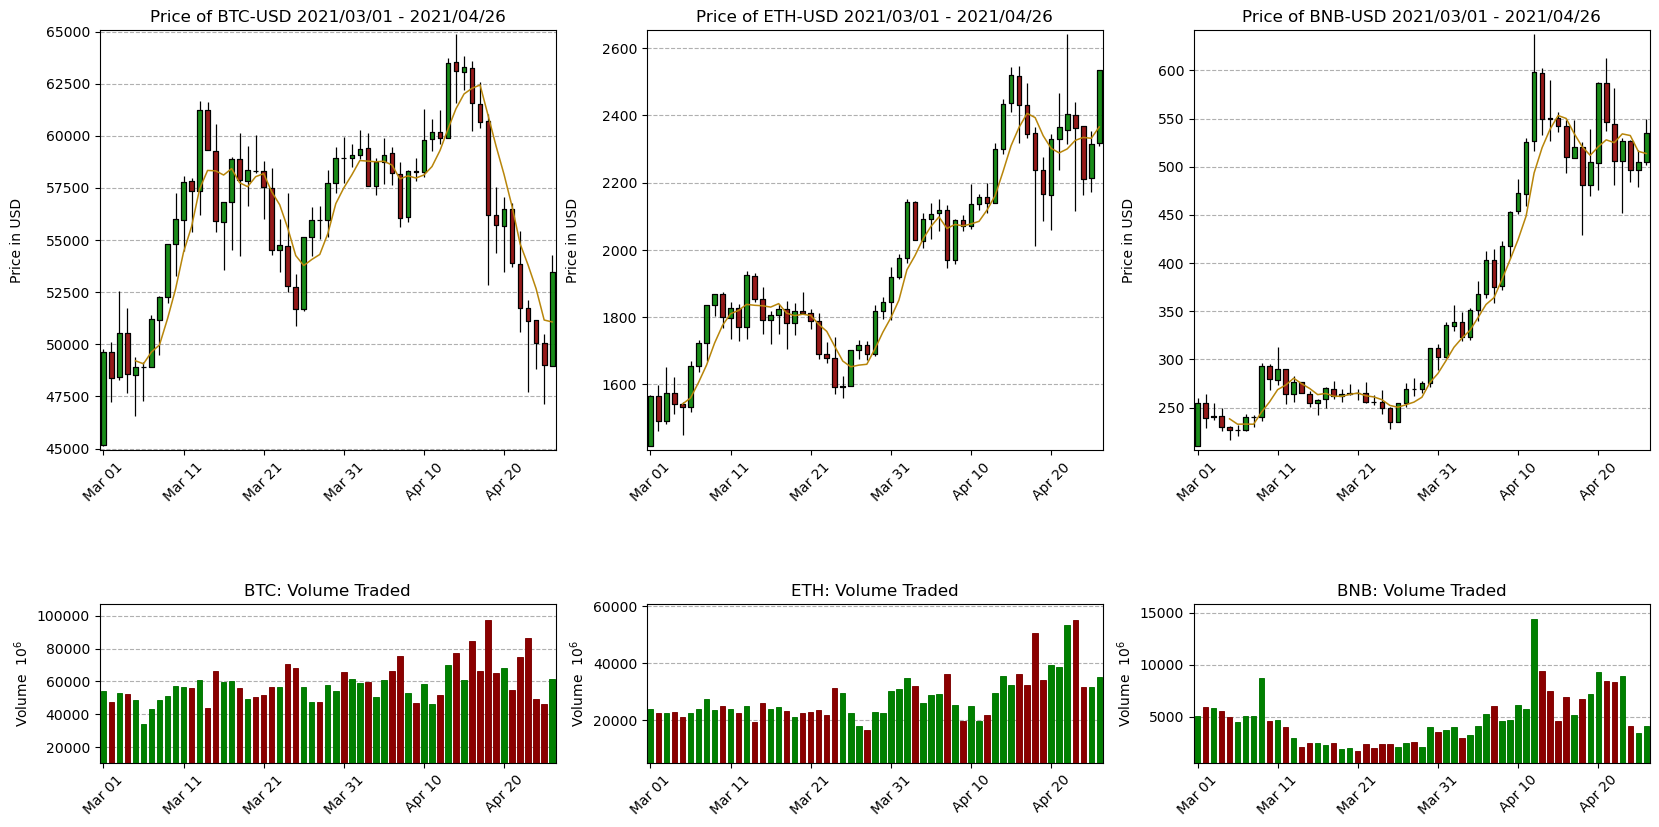

In [4]:
# Customizing the plot style
mc = mpf.make_marketcolors(up='green',down='darkred', volume='in')
custom_style_dark  = mpf.make_mpf_style(marketcolors=mc, gridstyle='--', gridaxis='horizontal',
                                    mavcolors=['darkgoldenrod'])

# Creating a new figure, setting the plot style
fig = mpf.figure(figsize=(20, 12),style=custom_style_dark)

# Creating three subplots for price data
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)

# Creating three lower subplots for volume data
av1 = fig.add_subplot(5, 3, 10, sharex=ax1, title="BTC: Volume Traded")
av2 = fig.add_subplot(5, 3, 11, sharex=ax1, title="ETH: Volume Traded")
av3 = fig.add_subplot(5, 3, 12, sharex=ax3, title="BNB: Volume Traded")

# Plotting the three datasets as candle charts with a line showing moving average over 5 days and volume below
for coin_data, price_axis, volume_axis in zip([btc, eth, bnb], [ax1, ax2, ax3], [av1, av2, av3]):
    mpf.plot(coin_data, type='candle', ax=price_axis, volume=volume_axis, mav=(5), 
             axtitle=f"Price of {coin_data.name} 2021/03/01 - 2021/04/26", 
             tight_layout=True, scale_width_adjustment=dict(volume=0.7, candle=1, lines=0.6), 
             ylabel='Price in USD\n')